### The Only Free Lunch in Finance
- The combination of two or more assets that are decorrelated can decrease the volatility in the extended level.

##### 2 - Assets Combinations
- Risk-Return Space or Mean-Variance Framework
    - on `x-axis`: Risk/Variance
    - on `y-axis`: Return of that asset
- What is the return and volatility of a combination of A and B?
    - A portfolio that is 100% in A and 0% in B?
        - the same as the Risk and Return of A
    - A portfolio that is 100% in B and 0% in A?
        - the same as the RIsk and Return of B?
    - 50% in A and 50% in B
        - Return:
            - The weighted mean of all the components of the portfolio.
        - Risk
            - Cannot be answered with just the return and volatility value of each asset.
            - Actually depending on the correlation between A And B.
            - If two assets are not correlated, i.e., A goes up, while B goes down and so on -> volatility will be less than just the weighted average of the volatility of two assets.
            - The more decorrelated they are, the less the volatility of that portfolio.

### Return
$$ R(w_A, w_B) = W_A \times R_A + W_B \times R_B $$

### Volatility
$$ {\sigma}^2(w_A, w_B) = \sigma_A^2 w_A^2 + \sigma_B^2 w_B^2 + 2w_Aw_B\sigma_A\sigma_B\rho_{A, B} $$

- Where $ \rho_{A, B} $ is the correlation between asset A and B.

### The Efficient Frontier
- As mentioned above, when we have two assets and aloocate the capital across these two assets, we are finding that we were able to build portfolios that had lower volatility than either one of the two assets.
- Now we introduce the third asset, we can expand the space of portfolios.

##### So, what is the Efficient Frontier?
- the Efficient Frontier is the line of curve on the edge of the Region of Possible Portfolios, that is considered as the best.
- Portfolios on the edge of the Region of Possible Portfolios represent the best you can do either in terms of expected return or expected volatility.
- Only portfolios that a mean-variance investor should be interested in.
    - A Mean-Variance Investors: The Investors who take care of volatility and returns.
    - The portfolios that offer the lowest volatility for a given level of return or
    - The portfolios of the highest expected returns for a given level of volatility.

### Quadprog to Draw the Efficient Frontier
- Convex Optimization to draw the Efficient Frontier
    - Given a set of asset returns volatilities and correlations we can plot the efficient frontier.
    - We need to have expression for the return and volatility for a portfolio.
        - Finding the series of point in the risk-return space, the Efficient Frontier, then we can plot the Efficient Frontier.
##### Return
- the weighted average of the returns
$$ \sum_{i = 1}^{k}{w_i \cdot R_i} $$
##### Volatility, Portfolio Variance, i.e., $\sigma^2$
- the simple generalization of the formula for the 2-assets case.
- 2-Assets Case
    $$ \sigma^2(w_A, w_B) = \sigma_{A}^2\omega_{A}^2 + \sigma_{B}^2\omega_B^2 + 2w_Aw_B\sigma_A\sigma_B\rho_{A, B} $$
    - Where $\rho_{A, B}$ is the correlation between asset A and B.
- Portfolio Variance
    $$ \sigma_P^2 = \sum_{i = 1}^k\sum_{j = 1}^k w_iw_j\sigma_i\sigma_j\rho_{i, j} $$
- Sum of $w$ for every possible combination of i and j
    
    $ \sigma_i\sigma_j\rho_{ij} $: the Covariance, measuring how much two different assets/portfolios co-vary.

### Matrix Form Expression for Portfolio Return
- Improve the volatility expression by using matrix notation.
- We start by constructing the followings:
    - the weight vector: $ k\times 1 $ vector of weights.
    - R: $ k\times 1 $ vector of asset returns.
    - Portfolio Return is equal to the weighted average of each portfolio's return.
    $$ R_p = w^T R $$
    - Where:
        - $R_p$: Return of the Portfolio
        - $w^T$: the Transpose of the weight vector, $w$

### Matrix Form Expression for the Covariance Matrix
- The Covariance Matrix is symmetric square, $k\times k$ matrix, where the ith and jth element is $\sigma_{ij}$, covariance betweeen the asset-i and asset-j.
    - Where Covariance between i and j is equal to $\sigma_i\sigma_j\rho_{ij}$.
- Each diagonal element of $\sum$ is $ \sigma_{ii} = \sigma_i\sigma_i\rho_{ii} = \sigma $
$$ \sigma_p^2 = w^T\sum w $$
- where
    - $\sigma_p^2$: the portfolio matrix
    - $w^T$: the transpose of the weight vector
    - $w%: the weight vector
    - $\sum$: the covariance matrix
- $\sum_{ii}$: the volatility of the asset $i$
- Diagonal element of the covariance matrix is the variance of each asset.

### Plotting the Efficient Frontier
- Start from the portfolio, which is know to be on the Efficient Frontier, more precisely, on the curve.
    - An asset with the lowest return
    - An asset wiht the highest return
- At this point, we know at least two points on the curve. Now, we use optimizer to find the minimum possible variance portfolio we can get on a certain level of return.
    - From minimum return to the maximum return and take that space and split it into grid.
    - and use optimizer to find the set of weight giving us the portfolio that minimizs the volatility for that level of return.
- In order to find the Efficient Frontier, recall that the portfolio on the Efficient Frontier is the one with the Minimum Volatility for a certain level of return.
##### Quadratic Form
Minimize: $ \frac{1}{2}w^T\sum w $
- Known as qudartic form, the input to hand over to quadratic optimizer.
subject to the followings:
- $w^T R = r_0$: Return must be at a certain level.
- $w^T 1 = 1$: The sum of weight of each asset is 1.
- $ w \geq 0$: No shortage in the total weight.

### Computation of the Efficient Frontier
How to compute the efficient frontier when we have a set of expected returns, volatilities (or variance) and correlations (or covariance). It is a fair question as to how we can get these numbers for the future, but for now, we assume that historic returns are a reasonable assumption.

In [2]:
import pandas as pd
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

/tmp/ipykernel_1091/205007867.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


In [3]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [4]:
# We can observe that column value has embedded spaces.
# We can strip out the leading and trailing spaces in the Series by using `.str.strip` method.
# cleaning the label of data
# since the column names have embedded spaces, we can strip out the leading and trailing spaces
# in the Series by using the .str.strip() method.
ind.columns = ind.columns.str.strip();
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [5]:
# 1110 rows and 30 columns
ind.shape

(1110, 30)

In [6]:
def get_ind_returns():
    """
    Load and format the Ken French 30 Industry Portfolios Value Weighted Monthly Returns
    """
    ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind

In [7]:
import portfolio_management_lib as port

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Ken French 30 Industry Portfolios Value Weighted Monthly Return
ind = port.get_ind_returns() 
ind.shape

/home/joe/Study/portfolio_management_prac/lib/portfolio_management_lib.py:215: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


(1110, 30)

<Axes: >

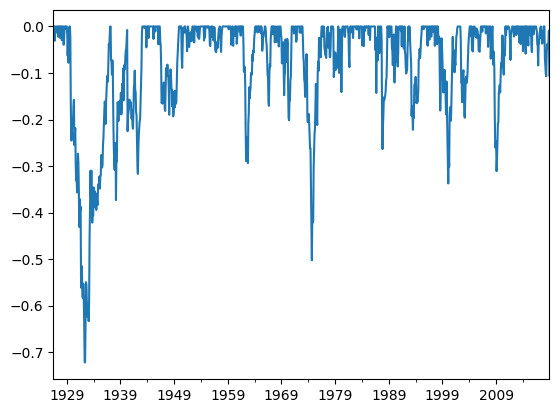

In [8]:
# check the drawdown of the Food industry
    # drawdown: The decline in value of a single investment or an investment portfolio from a
    # relative peak value to a relative trough.
port.drawdown(ind["Food"])["Drawdown"].plot.line()

<Axes: >

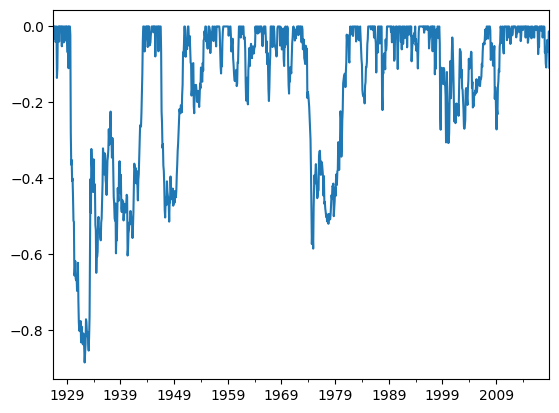

In [9]:
port.drawdown(ind['Beer'])['Drawdown'].plot.line()

<Axes: >

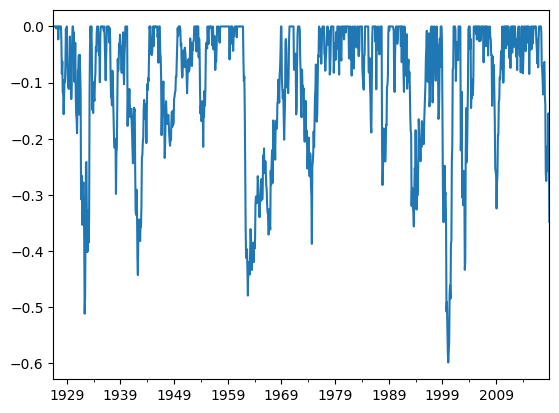

In [10]:
port.drawdown(ind['Smoke'])['Drawdown'].plot.line()

In [11]:
# Using Semi-Parametric Approach to get VaR
port.var_gaussian(ind[["Food", "Beer", "Smoke"]], modified = True)

Food     0.061207
Beer     0.033881
Smoke    0.080292
dtype: float64

<Axes: >

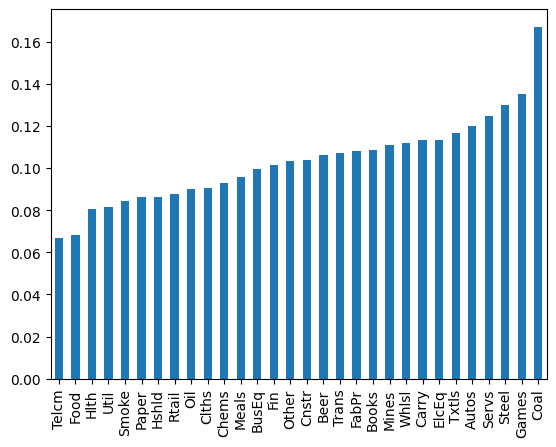

In [12]:
port.var_gaussian(ind, modified = False).sort_values().plot.bar()

<Axes: >

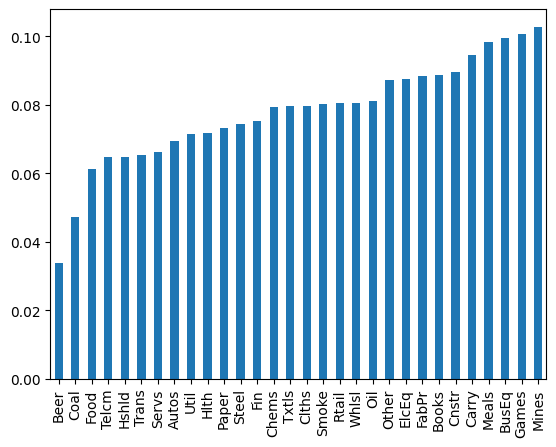

In [13]:
port.var_gaussian(ind, modified = True).sort_values().plot.bar()

Let's use this as an opportunity to write functions for annualized returns, volatility and sharpe ratios.

In [14]:
'''
periods_per_year is the number of entries per year.
e.g., if the data is monthly-basis, the value is 12.
if the data is daily-basis, it should be around 255, the average number of working days per year, i.e., the number of days
the USA stock market is open.
'''

def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the period per year
    """
    compounded_growth = (1 + r).prod() # prod(): return the product of the values over the requested axis.
    n_periods = r.shape[0]
    return compounded_growth ** (periods_per_year/n_periods) - 1

def annualize_vol(r, periods_per_year):
    """
    Annualizes the volatility of a set of returns
    We should infer the period per year
    """
    return r.std() * (periods_per_year ** 0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns.
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1 + riskfree_rate) ** (1/periods_per_year) - 1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol


In [15]:
# this will return the annualized return
port.annualize_rets(ind, "Monthly")

Food     0.106649
Beer     0.120041
Smoke    0.122324
Games    0.091829
Books    0.079147
Hshld    0.093513
Clths    0.093518
Hlth     0.116723
Chems    0.107320
Txtls    0.083356
Cnstr    0.086209
Steel    0.067926
FabPr    0.098153
ElcEq    0.109179
Autos    0.094397
Carry    0.107120
Mines    0.075994
Coal     0.062543
Oil      0.101700
Util     0.090147
Telcm    0.092669
Servs    0.109196
BusEq    0.112490
Paper    0.106115
Trans    0.084093
Whlsl    0.067420
Rtail    0.107438
Meals    0.106644
Fin      0.098169
Other    0.068767
dtype: float64

In [22]:

port.sharpe_ratio(ind, 0.03, "Monthly").sort_values()

Coal     0.023984
Steel    0.035788
Whlsl    0.040749
Other    0.045654
Mines    0.050109
Books    0.054442
Games    0.054636
Txtls    0.054970
Trans    0.060512
Autos    0.063875
Cnstr    0.064606
FabPr    0.074353
Servs    0.074557
Fin      0.079102
Carry    0.079829
ElcEq    0.081754
Clths    0.082307
Hshld    0.086307
Util     0.086317
Oil      0.092448
Meals    0.092914
BusEq    0.095544
Chems    0.096290
Beer     0.097689
Rtail    0.101707
Paper    0.101874
Telcm    0.107671
Hlth     0.121739
Smoke    0.123835
Food     0.126997
dtype: float64

<Axes: title={'center': 'Industry Sharpe Ratio after 2000'}>

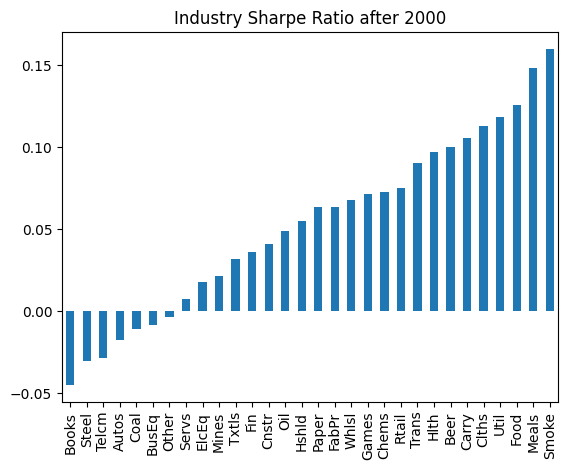

In [24]:
port.sharpe_ratio(ind['2000':], 0.03, "Monthly").sort_values().plot.bar(title="Industry Sharpe Ratio after 2000")

##### Expected Returns and the Covariance Matrix
Generating the efficient frontier requires a set of expected returns and a covariance matrix. For now, let's assume that we can estimate these simply by looking back in time and naively assuming they will hold in the future. Clearly, they will not, but we will have plenty of time to dig into that in the future. For the moment, assume that our naive method of estimating these parameters will suffice.

We can generate an estimate of expected returns using the `annualize_rets()` function, that returns a vector of expected returns. For instance, let's generate the set of expected returns based on historic returns from the 5 year period from 1996 through 2000.

In [19]:
er = port.annualize_rets(ind['1995': '2000'], 12)
er

Food     0.012253
Beer     0.014611
Smoke    0.010184
Games    0.007110
Books    0.015354
Hshld    0.012559
Clths    0.007926
Hlth     0.021791
Chems    0.008469
Txtls   -0.003075
Cnstr    0.009356
Steel    0.009130
FabPr    0.010755
ElcEq    0.021576
Autos    0.007573
Carry    0.017924
Mines   -0.001725
Coal     0.024886
Oil      0.014216
Util     0.013355
Telcm    0.012722
Servs    0.016344
BusEq    0.021825
Paper    0.009514
Trans    0.009708
Whlsl    0.011624
Rtail    0.014736
Meals    0.008571
Fin      0.019957
Other    0.005600
dtype: float64

<Axes: >

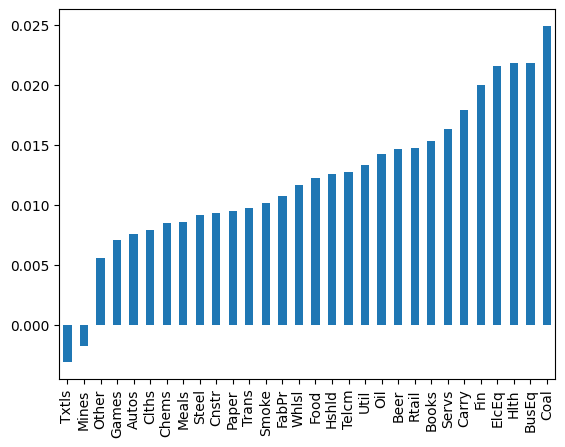

In [20]:
er.sort_values().plot.bar()

In [21]:
cov = ind["1995":"2000"].cov()
cov.shape

(30, 30)

In the next session, we will take the expected returns vector and the covariance matrix we've constructed and start to plot the efficient frontier.